In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def conditional_random(arr, condition):
  filtered_indices = [(i, x) for i, x in enumerate(arr) if condition(x)]
  if filtered_indices:
    return random.choice(filtered_indices)

# Lab 2: The perceptron - Linear classifier

## Coding the Perceptron Algorithm
Time to code! In this exercise, you'll have the chance to implement the perceptron algorithm to separate the following data (given in the file data.csv). Implement the perceptron algorithm, using the step activation function

We can think of the perceptron as the simplest neural network, composed by a single artificial neuron. An artificial neuron is a function of the input $x=(x_1, \ldots, x_N)^\top$ weighted by a vector of connection weights $W=(w_1, \ldots, w_N)^\top$, completed by a neuron bias $b$ and passed to an activation function $\phi$. Its output is $\hat{y}=\phi(f)$.

<center><img src='https://drive.google.com/uc?id=1evxKu_fUtTHd05f3H19GfFfTaac3weQs' width='300',height='300'/> </center>
$$ \hat{y} = \phi(W^\top x + b )$$


Learning with the perceptron consists in updating the weights: $W'= W + \eta (y_i -\hat{y_i})x_i , i \in \{1, \ldots, M\}$ where $\eta$ is the learning rate, $y_i$ is the correct output for the input $x_i$ and $M$ is the size of the training set.

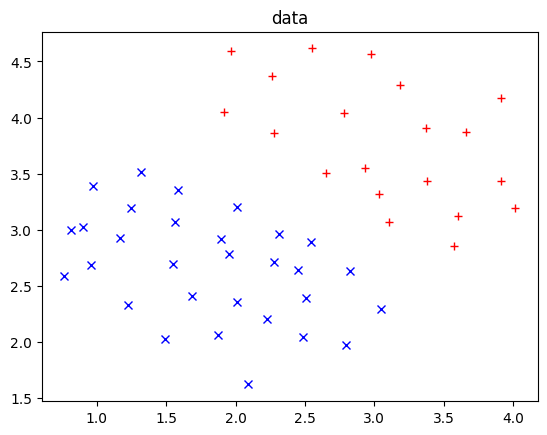

In [ ]:
# Load the dataset in the example file "data1.txt"
# (Attention! Similar to TP1, create the folder "data" and put all data files inside.)
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/TP2-lab2/data/data1.txt', delimiter=',')

X = data[:, 0:2]
y = data[:, 2]

# Plot data
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'r+')
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'bx')
plt.title("data")
plt.show()


### **Task**: Implement the perceptron algorithm using the step activation function

<img src='https://drive.google.com/uc?export=view&id=1xQzhraj2Uipr0oJ5xhotTAMj96ODl7Ga'/>

See more details of Perceptron Learning Algorithm <a href='https://ai-master.gitbooks.io/perceptron/content/pla.html'>here</a>.

In [ ]:
def step_activation(x):
    # Step activation
    if x > 0 :
        return 1
    else :
        return 0

def prediction(W, X, b):
    return step_activation((np.matmul(W.T,X)+b)[0])

def perceptron(W, b, X, y, lr):
    """
    Args:

    W (np.array)  : (INPUT_SHAPE, 1) vector of weights
    b             : bias
    X (np.array)  : (INPUT_SHAPE, 1) input vector
    y             : output label (1 or 0)
    lr            : learning rate

    Returns:
    (err, W, b)   : err is 1 if the predicted label is different from y, 0 otherwise
        W, b      : The updated weights and bias
    """
    # Insert your solution here
    y_pred = prediction(W, X, b)
    diff = y - y_pred

    if diff == 0: return (0, W, b)

    W_upd = W + diff*X
    b_upd = b + diff


    return (1, W_upd, b_upd)


<ipython-input-21-13121ac410cc>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = W[0]*u[i]+W[1]*v[j]+b


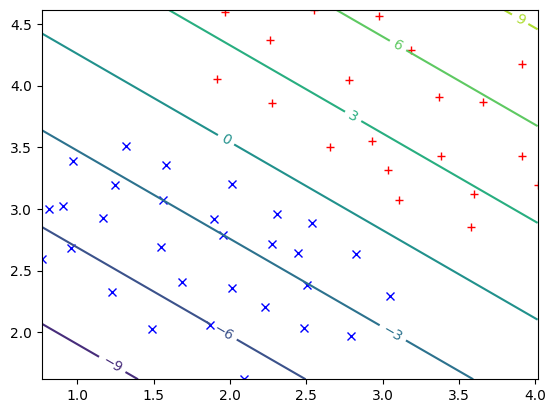

In [ ]:
#initialize weights and b
b = 0.0
W = np.random.normal(size=(X.shape[1], 1))

errors=1
while errors > 0:
    # start epoch
    errors=0
    for i in range(X.shape[0]):
        xi = X[i,:].reshape(-1,1)
        yi = y[i]
        (err, W, b) = perceptron(W,b,xi,yi, 0.1)
        errors+=err

#plot decision boundary
fig, ax = plt.subplots()
ax.plot(X[:,0][y == 1], X[:,1][y == 1], 'r+', label="$y=1$")
ax.plot(X[:,0][y == 0], X[:,1][y == 0], 'bx', label="$y=0$")
u = np.linspace(min(X[:, 0]),max(X[:, 0]), 200)
v = np.linspace(min(X[:, 1]),max(X[:, 1]), 200)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        x = np.array([[u[i],v[j]]])
        z[i, j] = W[0]*u[i]+W[1]*v[j]+b
CS=plt.contour(u,v,z.T)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

#  Lab 2: Supervised Classification

## Logistic Regression and Gradient Descent


In linear regression, we got a real-valued response

$$y = \theta_0 + \theta_1 x_1 + \cdots + \theta_d x_d$$
    
i.e., a linear combination of inputs, where $y \in \mathbb{R}$.

<div class="alert alert-block alert-info">

Note: in this lab we are going to use $\theta$ to denotate the parameters, instead of $\beta$ as we introduced in the first lab

</div>

In classification, we want an *indication* of how likely an instance is to belong to a particular class; a probability $\in [0,1]$.  

Given a real valued $z$, we can squish it to range $\sigma(z) \in [0,1]$ by feeding it through the **logistic function** aka **sigmoid function**:

\begin{equation}
\sigma(z) = \frac{1}{1+\exp(-z)} \hspace{1.5cm}
\end{equation}

Which looks like this: ![Sigmoid](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

Therefore, we can treat this as a probability, i.e.,

\begin{align*}
P(y=1|\mathbf{x}) &= \sigma(\mathbf{\theta}^\top\mathbf{x}) \\
P(y=0|\mathbf{x}) &= 1 - \sigma(\mathbf{\theta}^\top\mathbf{x})
\end{align*}

where we omit the bias term and suppose that both $\mathbf{\theta}$ and $\mathbf{x}$ are column vectors.

> **Task 1**: Implement the sigmoid function $\sigma$ defined above.


In [1]:
def sigmoid(z):
    # insert here the code for Task 1
    return 1/(1+np.exp(-z))

In order to chose values for the parameters of logistic regression, we use **maximum likelihood estimation** (MLE). As such we are going to have two steps:

1. write the likelihood function;
2. find the values of $\theta$ that maximize the log-likelihood function.

The labels that we are predicting are binary, this means that we can interpret each label as a Bernoulli random variable: $Y \sim Ber(p)$ where $p = \sigma(\mathbf{\theta}^\top\mathbf{x})$.

Therefore, we can write the probability of a data point as:
$$
P\left(Y=y|X=\mathbf{x}\right) = \sigma(\mathbf{\theta}^\top\mathbf{x})^y \cdot \left[1-\sigma(\mathbf{\theta}^\top\mathbf{x})\right]^{(1-y)}
$$

With the probability mass function we can now write the **likelihood** of the whole dataset:

\begin{equation}
L(\theta) = \prod_{i=1}^n P(Y = y_i|\mathbf{X} = \mathbf{x}_i) = \prod_{i=1}^n \sigma(\mathbf{\theta}^\top\mathbf{x}_i)^y_i \cdot \left[1-\sigma(\mathbf{\theta}^\top\mathbf{x}_i)\right]^{(1-y_i)} \hspace{1.5cm}(2)
\end{equation}

We can take the log of this function to transform the product into a sum and by doing that, we obtain the **log-likelihood**:

\begin{equation}
LL(\theta) = \sum_{i=1}^n y_i\log{\sigma(\mathbf{\theta}^\top\mathbf{x}_i)} + (1-y_i) \log{\left[1-\sigma(\mathbf{\theta}^\top\mathbf{x}_i)\right]} \hspace{1.5cm}(3)
\end{equation}

As you will remember from first lab, our objective is to minimize the error that we do by fitting our model to the data. However, log-likelihood increases when the model is fitting better to the data. That's the reason why in logistic regression we take the *negative* log-likelihood (also known as **cost** function $E(\theta)$).

> **Task 2**: Implement the negative log likelihood, or cost function

In [2]:
def cost(w, X, y):
  return -np.sum([y[i]*np.log(sigmoid(w.T@X[i])) + (1-y[i])*np.log(sigmoid(1-w.T@X[i]))])

  # Computes the cost using w as the parameters for logistic regression.
  # insert here your implementation

As in OLS of the previous lab we want to find values of the parameters which minimize our cost function.

>**Ques 1**:Derive the gradient of the cost function with respect to the model's parameters $\nabla_{\mathbf{\theta}} E(\mathbf{\theta})$.

<div class="alert alert-block alert-info">
Some hints:

- you can use the expression of a Bernoulli distribution, $\sigma_i^{y_i} (1-\sigma_i)^{1-y_i}$ where $\sigma_i \equiv \sigma(\mathbf{\theta}^\top\mathbf{x}_i)$.

- A useful derivative: $\sigma' = (1 - \sigma)\sigma$.
</div>

You'll notice that, unlike under OLS, it's not a closed form expression; you have $\mathbf{\theta}$ on the right hand side of the equation. Nevertheless, we can use numerical methods to find the optimal ${\mathbf{\theta}^*}$.

>**Task 3**: Implement the gradient of the cost function (which you just derived above).


In [ ]:
def compute_grad(w, X, y):
    # Computes the gradient of the cost with respect to the parameters.

    dE = np.zeros_like(w) # initialize gradient

    # insert here your code
    

    return dE

What we have now is a vector $\mathbf{g} = \nabla_{\mathbf{\theta}} E(\mathbf{\theta})$; the **gradient** of the cost function. Note that the dimensionality is the same as the input. We can move in the direction of the gradient and thus descend the function. This is the idea of **Gradient Descent**: we iteratively follow the gradient down the error surface. We repeatedly carry out
\begin{equation}
\mathbf{\theta}_{t+1} = \mathbf{\theta}_{t} - \alpha \nabla_{\mathbf{\theta}} E(\mathbf{\theta}_t) \hspace{1.5cm}(4)
\end{equation}

where $\alpha$ is the **learning rate**; for $t=1,2,\ldots,T$, such that $\mathbf{\theta}^* \gets \mathbf{\theta}_T$.


Let's load the data and inspect the dataset

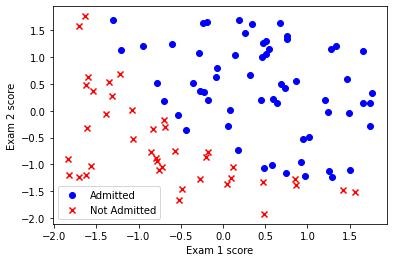

In [6]:
# Load the dataset
data = np.loadtxt('data.csv', delimiter=',')

#Add intercept term
data_1 = np.ones((data.shape[0], 4))
data_1[:, 1:] = data

# Standardize the data
# (It will still work without standardization, but may behave erratically)
data_1[:,1:3] = (data_1[:,1:3] - np.mean(data_1[:,1:3],axis=0)) / np.std(data_1[:,1:3],axis=0)

X = data_1[:, 0:3]
y = data_1[:, -1]

# Plot data
pos = np.where(y == 1) # instances of class 1
neg = np.where(y == 0) # instances of class 0
plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()


N = X.shape[0]

# Initialize fitting parameters
theta = np.random.randn(3,1) * 0.05

Now all it's remaining to do is to find the optimal parameters using gradient descent

> **Task 4**: Use the functions implemented so far to implement gradient descent, Eq.(4), for a fixed number of steps (say, $T=10\,000$) and learning rate to (say, $\alpha=0.005$).

In [ ]:
alpha = 0.005
T = 10000

for i in range(T):
    # insert here your code
    pass

> **Task 5**: Implement a function to provide predictions $\hat{\mathbf{y}} \in \{0,1\}$ for any given $\mathbf{x}$ and $\hat{\mathbf{\theta}}$ (from the previous task) by assigning $\hat{\mathbf{y}}_i = 1$ whenever $\sigma_i \geq 0.5$. In other words, you turn logistic regression into a **classifier**.

In [ ]:
def predict(w, X):
    # Predict whether each label is 0 or 1 using learned logistic regression parameters w. The threshold is set at 0.5

    N = X.shape[0] # number of examples
    yp = np.zeros(N) # predicted classes of examples

    # insert here your code
    return yp

There is data provided in the *data/* folder. Suppose that each column represents an exam score during a course, with the class label indicated *admitted* or not into a Masters program at some university. We want a model to give the probability that a student will be admitted based on the two grades of two courses. Some plotting code is already provided.

> **Task 6**: Make a train-test split of the data provided and evaluate your classifier (similarly to as in the first lab). Output and/or plot the error $E(\mathbf{\theta}_t)$ both on the training **and** test set, for $t=1,\ldots,T$.


> **Ques 2**: Knowing that the cost function is convex, are you convinced that with a suitable learning rate, gradient descent will always converge to the minimum? What are some examples of poor learning rates?

> **Task 7**: Following your considerations in the previous question -- can you find a better learning rate, such that you reduce error more efficiently (for smaller $T$?).

> **Task 8**: Instead of the whole training set, select a random subset (i.e., minibatch) of 10 examples for each iteration. This is known as **stochastic gradient descent**.

> **Ques 3**: What are the advantages of stochastic gradient descent over classical gradient descent? (Especially with a non-convex loss function).